# CSC3831 Final Assessment - Part I: Data Engineering



In [6]:
# Loading in standard packages for analysis, feel free to add an extra packages you'd like to use here
import random
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
# Loading in the corrupted dataset to be used in analysis and imputation
houses_corrupted = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/CORRUPTED/HOUSES/houses_0.1_MAR.csv', header=0)
# Remove an artifact from the dataset
houses_corrupted.drop(["Unnamed: 0"], axis=1, inplace=True)

Above we've loaded in a corrupted version of a housing dataset. The anomalies need to be dealt with and missing values imputed.

### 1. Data Understanding [7]
- Perform ad hoc EDA to understand and describe what you see in the raw dataset
  - Include graphs, statistics, and written descritpions as appropriate
  - Any extra information about the data you can provide here is useful, think about performing an analysis (ED**A**), what would you find interesting or useful?
- Identify features with missing records, outlier records


In [2]:
houses_corrupted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   median_house_value  20640 non-null  float64
 1   median_income       18576 non-null  float64
 2   housing_median_age  18576 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          18576 non-null  float64
 6   households          20640 non-null  float64
 7   latitude            20640 non-null  float64
 8   longitude           20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [3]:
houses_corrupted.describe()

,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
count,20640.000000,18576.000000,18576.000000,20640.000000,20640.000000,18576.000000,20640.000000,20640.000000,20640.000000
mean,206855.816909,3.929958,28.324182,2635.763081,537.898014,1488.069283,499.539680,35.631861,-119.569704
std,115395.615874,1.964296,12.584914,2181.615252,421.247906,1170.585810,382.329753,2.135952,2.003532
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000
25%,119600.000000,2.560300,18.000000,1447.750000,295.000000,839.000000,280.000000,33.930000,-121.800000
50%,179700.000000,3.572400,28.000000,2127.000000,435.000000,1227.000000,409.000000,34.260000,-118.490000
75%,264725.000000,4.870050,37.000000,3148.000000,647.000000,1803.000000,605.000000,37.710000,-118.010000
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000


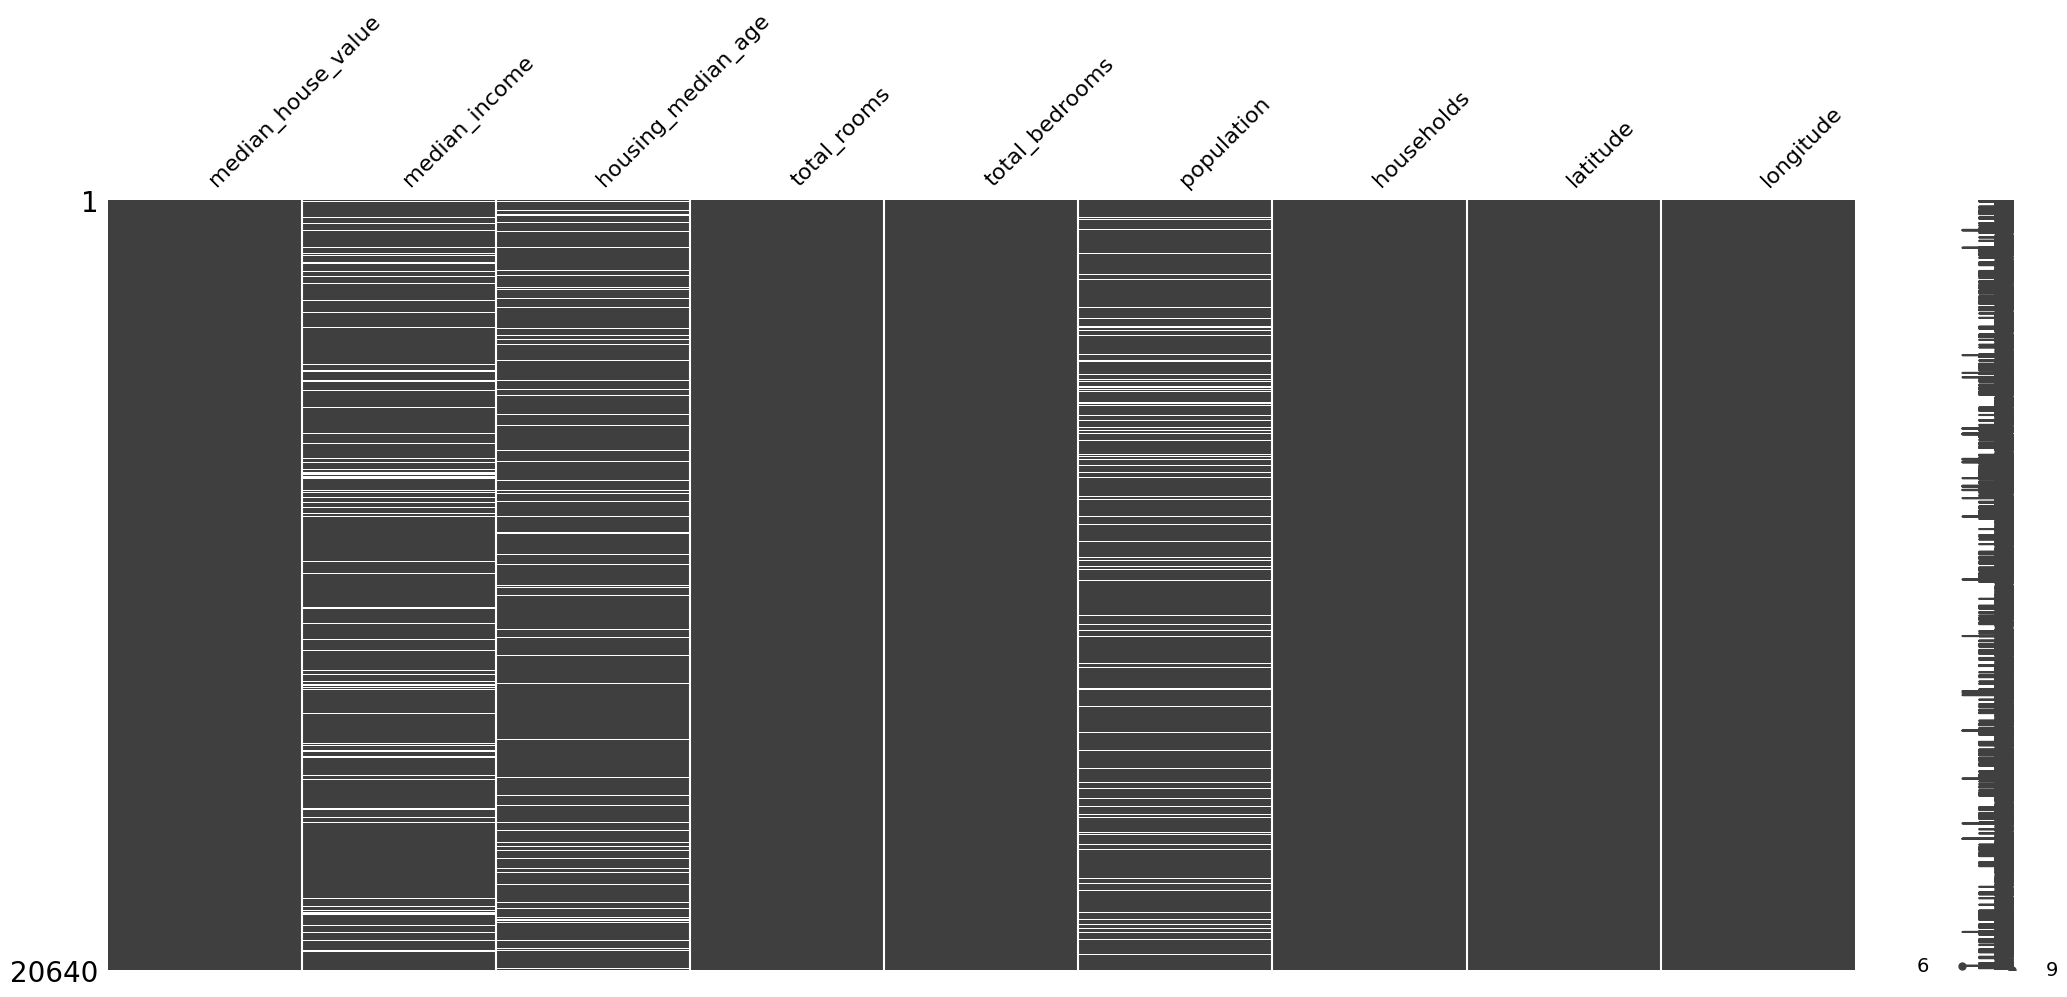

In [7]:
# Visualize missing data
msno.matrix(houses_corrupted)
plt.show()

In [9]:
# Count missing values per feature
missing_data = houses_corrupted.isnull().sum().sort_values(ascending=False)/len(houses_corrupted)*100
print(missing_data)

median_income         10.0
housing_median_age    10.0
population            10.0
median_house_value     0.0
total_rooms            0.0
total_bedrooms         0.0
households             0.0
latitude               0.0
longitude              0.0
dtype: float64


The missing data graph showcases the lost or incorrect data in the median_income, housing_median_age, and population sections. Each of them are missing 10% of their records.

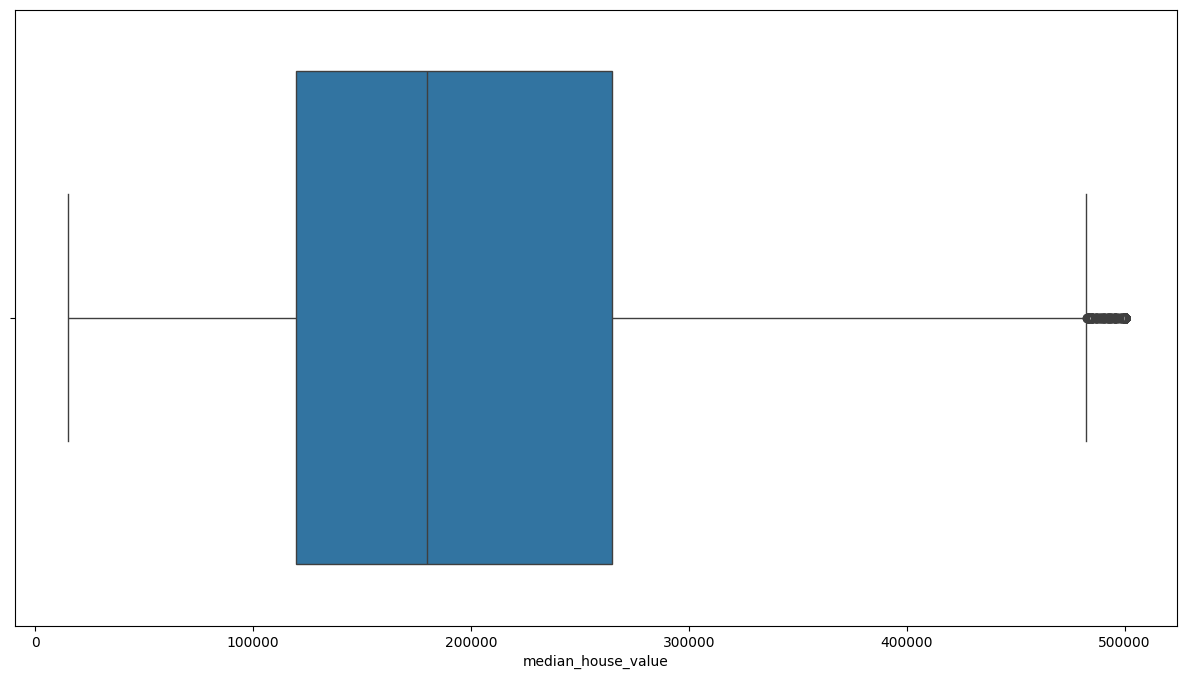

In [10]:
# Boxplots to visualize potential outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=houses_corrupted['median_house_value'], orient="h")
plt.show()

Median_house_value is positively skewed.
There are outliers compacted around $500,000.

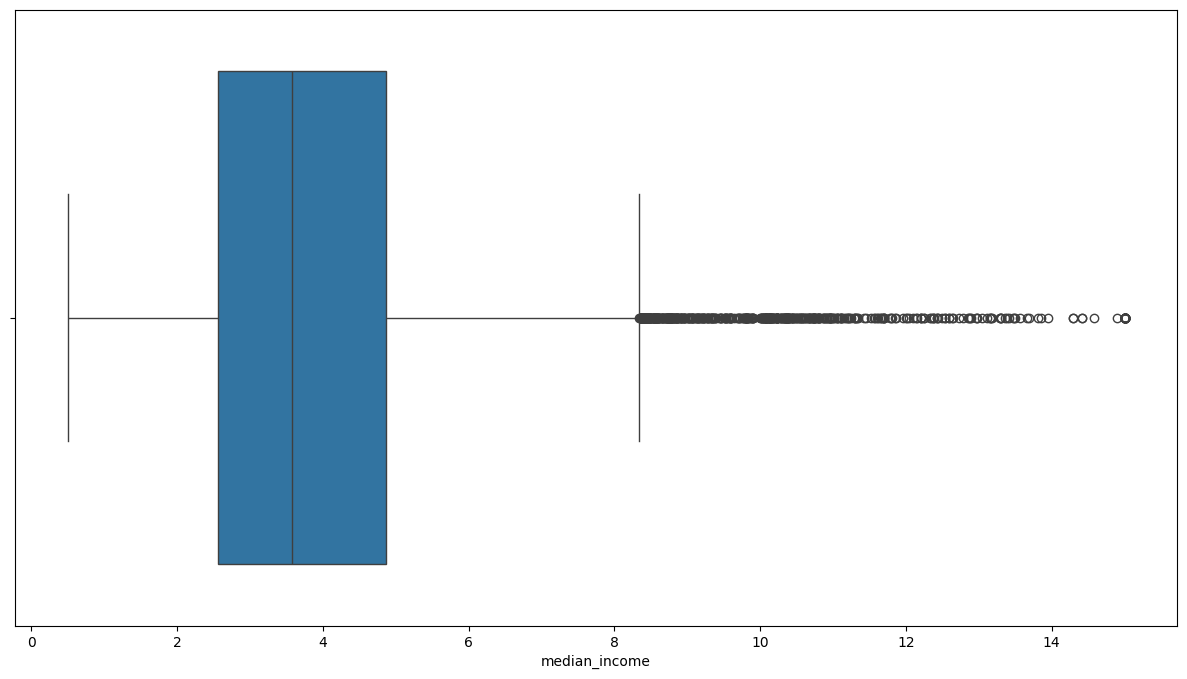

In [11]:
# Boxplots to visualize potential outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=houses_corrupted['median_income'], orient="h")
plt.show()

Medium_income is positively skewed.
There is a large number of outliers ranging from 8 to over 14.

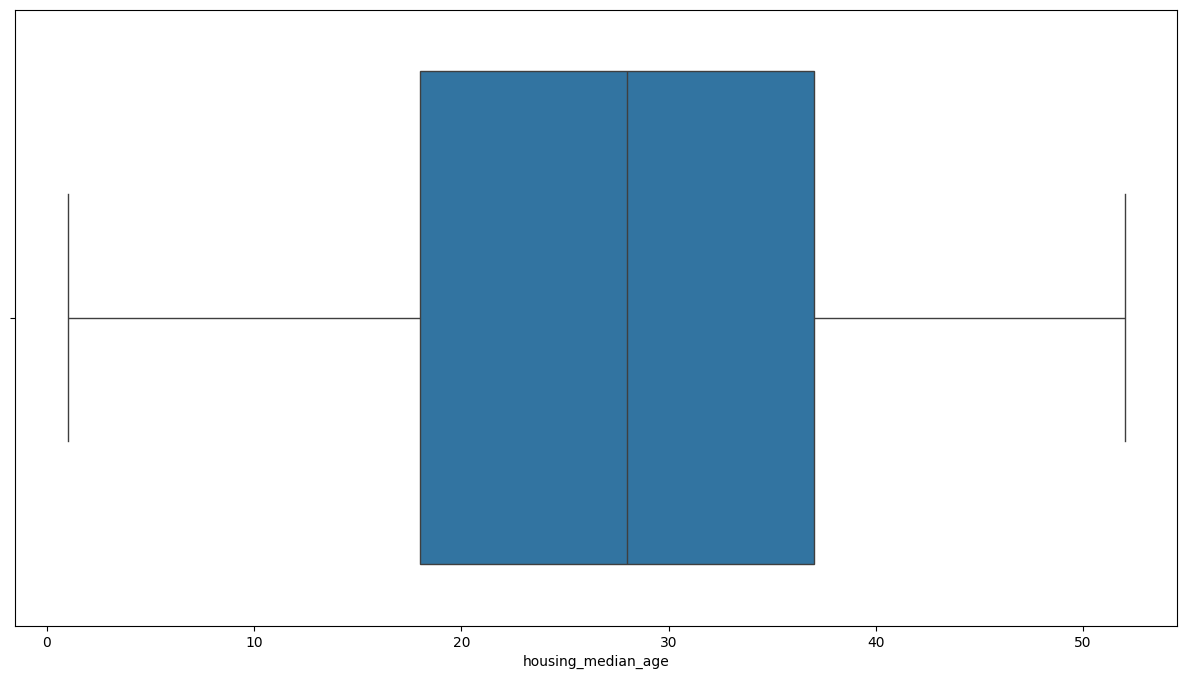

In [12]:
# Boxplots to visualize potential outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=houses_corrupted['housing_median_age'], orient="h")
plt.show()

Housing_median_age appears negatively skewed, although nearly at a normal distribution.
There are no outliers.

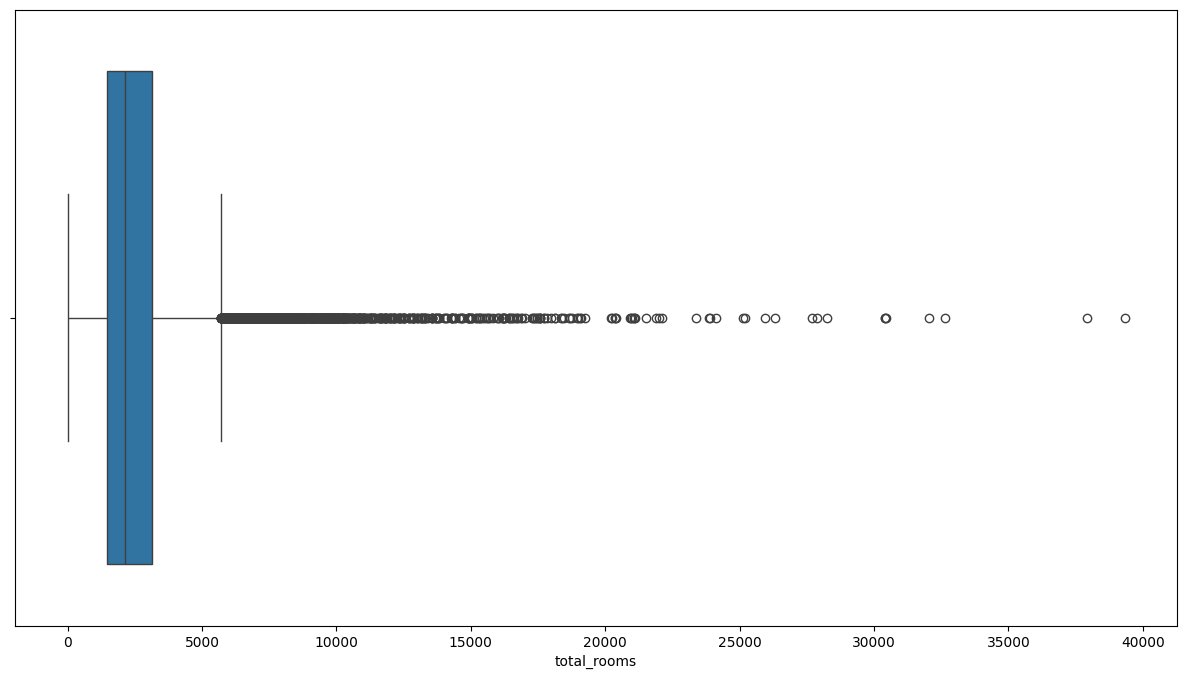

In [13]:
# Boxplots to visualize potential outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=houses_corrupted['total_rooms'], orient="h")
plt.show()

Total_rooms is positively skewed.
There is a large percentage of outliers ranging from 5,000 to 40,000 rooms.

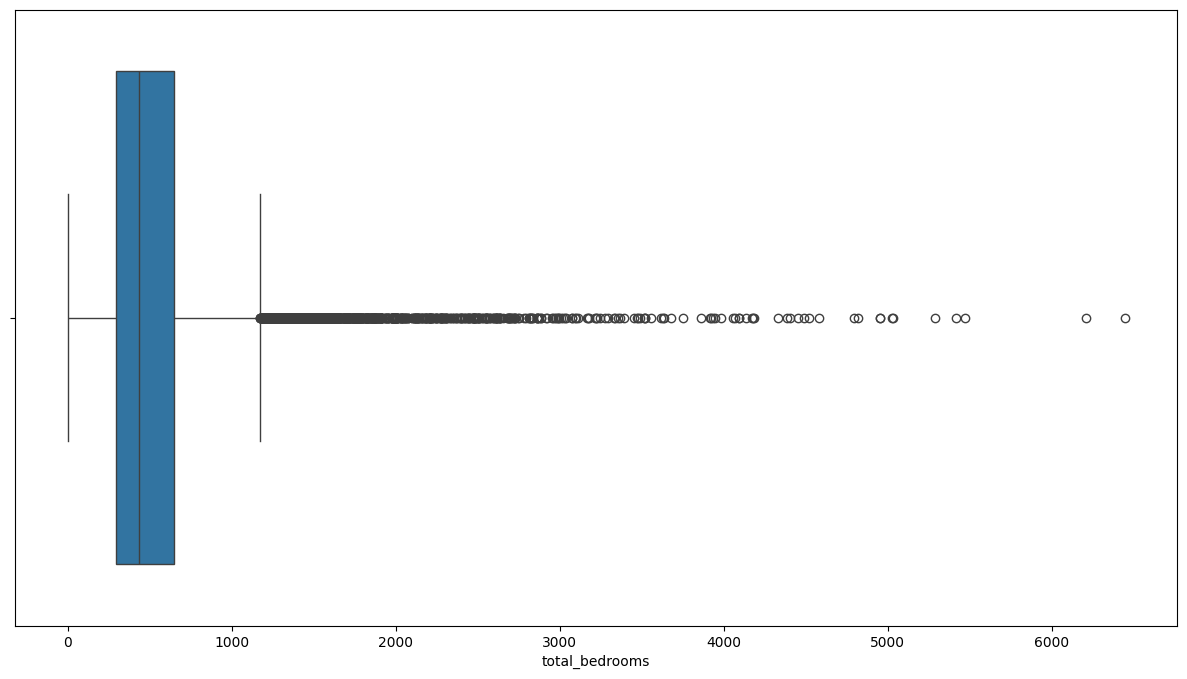

In [14]:
# Boxplots to visualize potential outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=houses_corrupted['total_bedrooms'], orient="h")
plt.show()

Total_bedrooms is positively skewed.
There is a large number of outliers ranging from over 1,000 to over 6,000.
I belive there is a direct linkage between this and total_rooms.

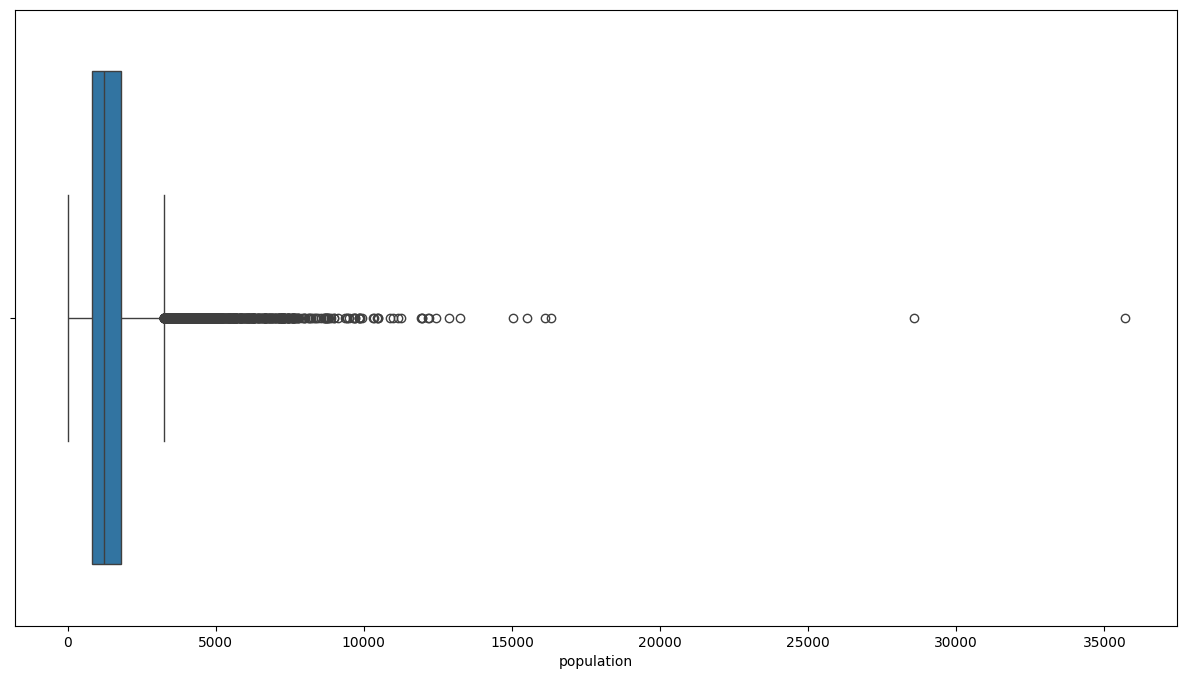

In [16]:
# Boxplots to visualize potential outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=houses_corrupted['population'], orient="h")
plt.show()

Population is positively skewed. There is a large number of outliers ranging from under 5,000 to a little over 35,000.

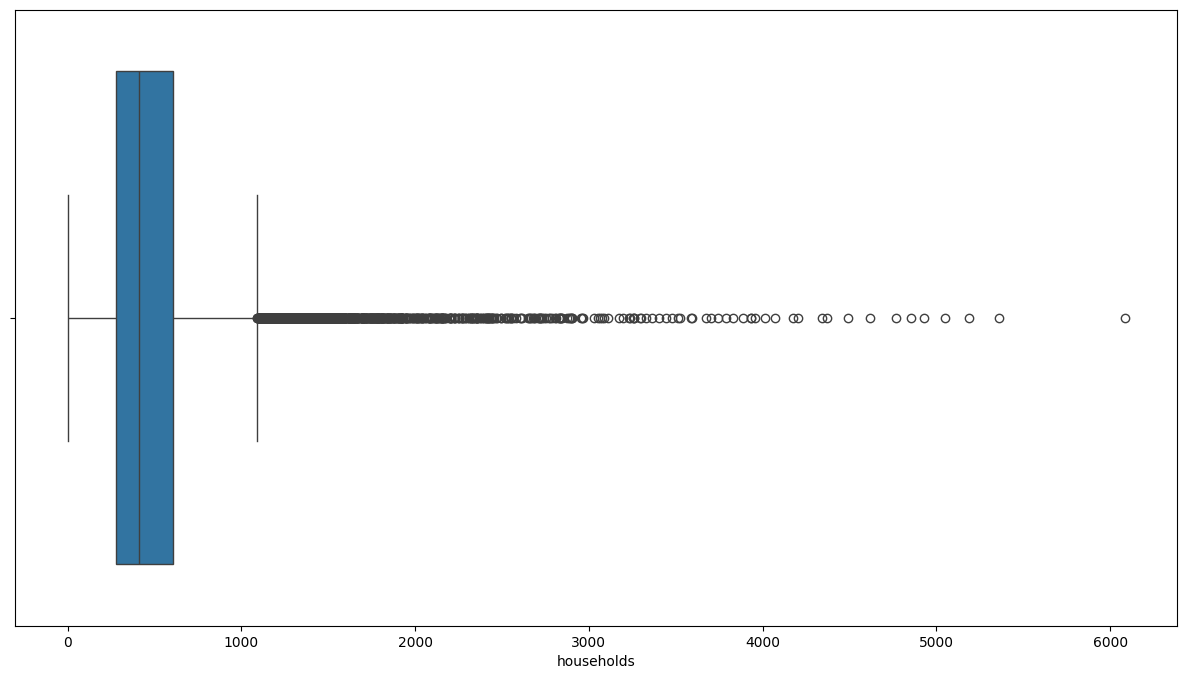

In [17]:
# Boxplots to visualize potential outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=houses_corrupted['households'], orient="h")
plt.show()

Households is positively skewed.
There are a large number of outliers ranging from a little over 1,000 to 6,000.

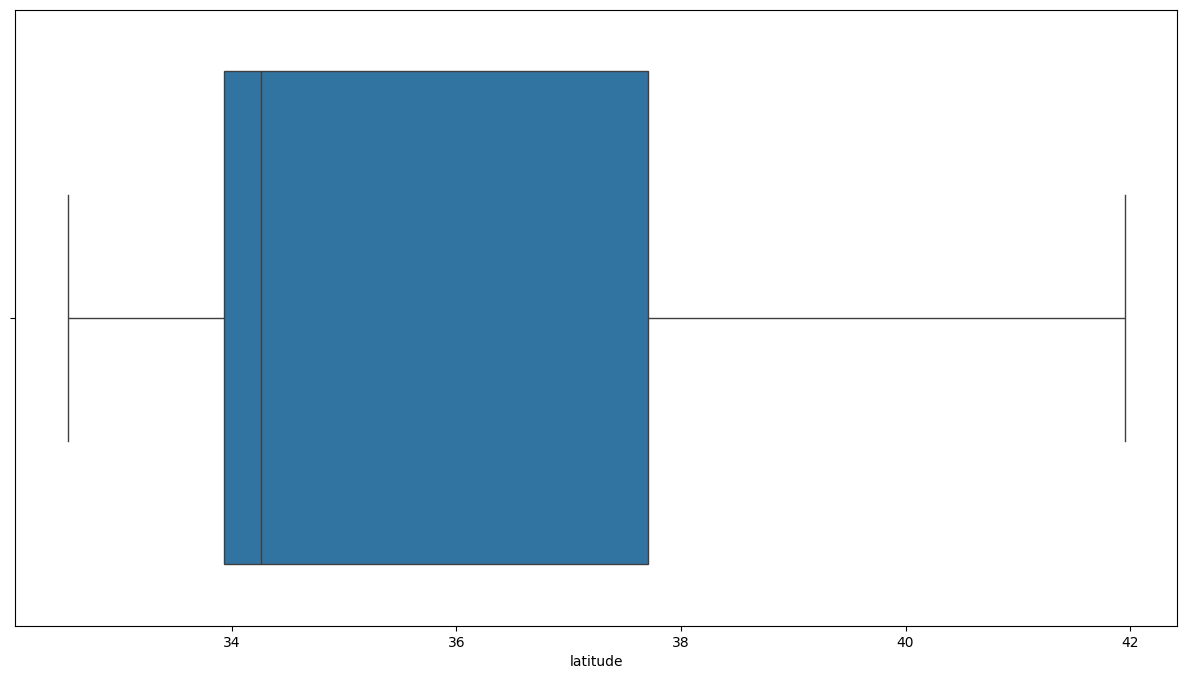

In [18]:
# Boxplots to visualize potential outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=houses_corrupted['latitude'], orient="h")
plt.show()

latitude is very positively skewed.
There are absolutely no outliers.

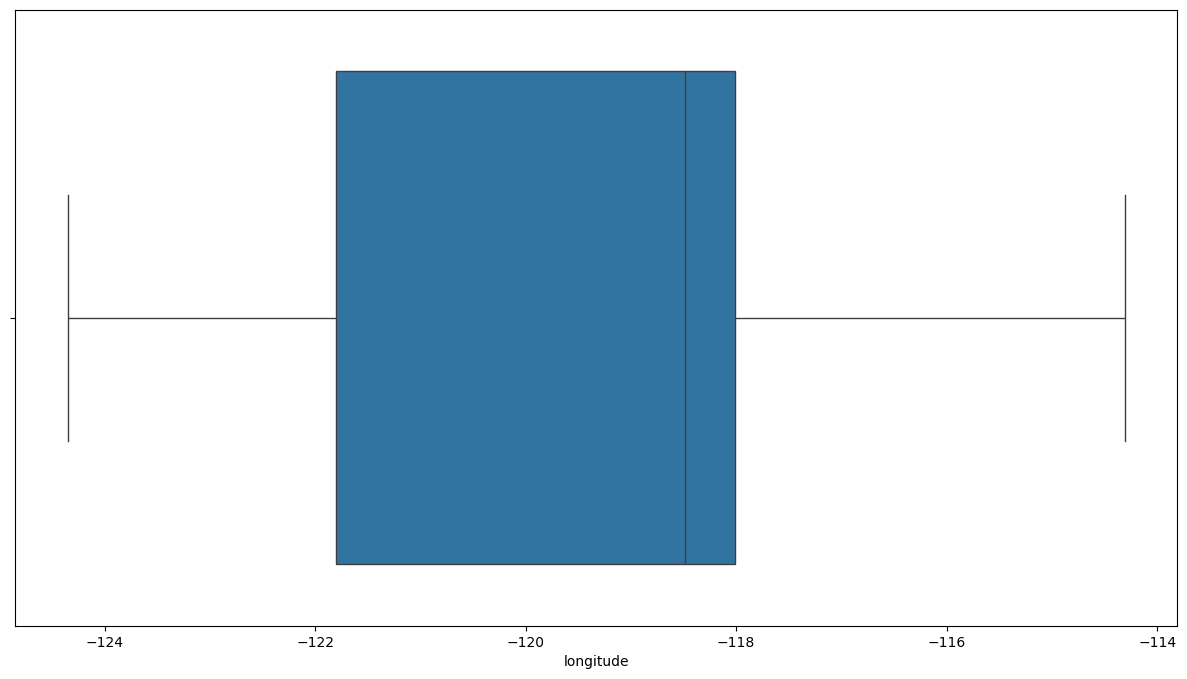

In [19]:
# Boxplots to visualize potential outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=houses_corrupted['longitude'], orient="h")
plt.show()

Longitude is very negatively skewed.
There are no outliers at all.


### 2. Outlier Identification [10]
- Utilise a statistical outlier detection approach (i.e., **no** KNN, LOF, 1Class SVM)
- Utilise an algorithmic outlier detection method of your choice
- Compare results and decide what to do with identified outleirs
  - Include graphs, statistics, and written descriptions as appropriate
- Explain what you are doing, and why your analysis is appropriate
- Comment on benefits/detriments of statistical and algorithmic outlier detection approaches


### 3. Imputation [10]
- Identify which features should be imputed and which should be removed
  - Provide a written rationale for this decision
- Impute the missing records using KNN imputation
- Impute the missing records using MICE imputation
- Compare both imputed datasets feature distributions against each other and the non-imputed data
- Build a regressor on all thre datasets
  - Use regression models to predict house median price
  - Compare regressors of non-imputed data against imputed datas
  - **Note**: If you're struggling to compare against the original dataset focus on comparing the two imputed datasets against each other


In [ ]:
# Use this dataset for comparison against the imputed datasets
houses = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/ORIGINAL/houses.csv', header=0)

### 4. Conclusions & Throughts [3]
- Disucss methods used for anomaly detection, pros/cons of each method
- Disucss challenges/difficulties in anomaly detection implementation
- Discuss methods used for imputation, pros/cons of each method
- Discuss challenges/difficulties in imputation implementation